In [357]:
import utils
grader = utils.Grader()

In [358]:
import os
import scipy
from scipy import io
import numpy as np
from numpy import linalg
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

## K-Means Clustering

In [359]:
data1 = io.loadmat("ex7data2.mat")
print(data1.keys())
X1 = data1["X"]                

dict_keys(['__header__', '__version__', '__globals__', 'X'])


### K-mean algorithm
#### 1. Cluster assignment step : Assign each data point to its closest centroid
#### 2. Move Centroid step: compute mean based on centroid assignmets

In [360]:
#random K and centroids(we can use above function for random centroids, here we are taking values asked to take)
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [361]:
def findClosestCentroids(x, centroids):
    m, n = x.shape
    K = len(centroids)
    idx = np.zeros((m,1))
    for i in range(m):
        lst = []
        for j in range(K):
            lst.append((x[i] - centroids[j]).dot((x[i] - centroids[j]).T))
        idx[i] = lst.index(min(lst))
    return idx

In [362]:
idx = findClosestCentroids(X1, initial_centroids) 
print('Closest centroids for the first 3 examples:\n', idx[:3].ravel())
print('the closest centroids should be 0, 2, 1 respectively')

Closest centroids for the first 3 examples:
 [0. 2. 1.]
the closest centroids should be 0, 2, 1 respectively


In [363]:
def computeCentroids(x,idx,k):
    m,n = x.shape
    p = np.c_[((idx)),x]
#     p1 = p[p[:,0] == 0]
#     p2 = p[p[:,0] == 1]
#     p3 = p[p[:,0] == 2]
    centroids = np.zeros((k,n))
    for i in range(k):
        for j in range(n):
            centroids[i][j] = np.mean(p[p[:,0] == i][:,j+1])
    return (centroids)

In [364]:
centroids= computeCentroids(X1,idx,K)
centroids

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [365]:
def plotDataPoints(x, idx):
    colors = ['r', 'g', 'b']
    for i in range(len(x)):
        plt.scatter(x[i][0],x[i][1], 20, marker = "o", edgecolors=colors[int(idx[i][0])], facecolors="None")
        

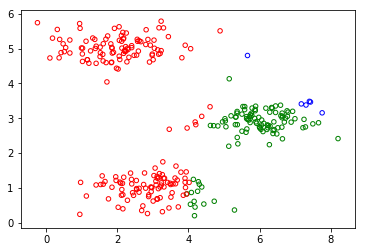

In [366]:
plotDataPoints(X1, idx)

In [367]:
def plotProgresskMeans(x, centroids, previous, idx, k):
    plotDataPoints(x,idx)
    plt.scatter(previous[:,0], previous[:,1], 80, marker='x',  color="k" )
    plt.scatter(centroids[:,0], centroids[:,1], 80, marker='x',  color="k" )
#     for j in range(k):
#         plt.plot(previous[j], centroids[j],  linestyle='dashed', c= "k", linewidth=1, markersize=12)

In [368]:
def runkMeans(x, centroids, max_iters, plot_progress=False):
    m,n = x.shape
    K = len(centroids)
    idx_history = []
    for i in range(max_iters):
        idx = findClosestCentroids(x, centroids)
        if plot_progress:
            idx_history.append(idx)
            previous_centroids = centroids
            centroids = computeCentroids(x, idx, K )
    plotProgresskMeans(x,centroids,previous_centroids, idx, K)
    return (idx, centroids)

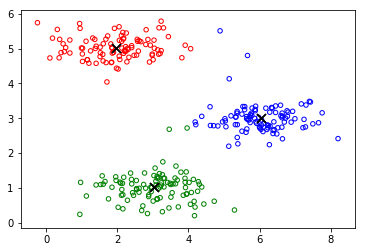

In [369]:
idx, centroids = runkMeans(X1, initial_centroids, max_iters=10, plot_progress=True)

In [370]:
def kMeansInitCentroids(x,k):
    return x[np.random.choice(x.shape[0], k)]

### Image compression with K-mean (K-mean on pixels)

In [371]:
A = plt.imread("bird_small.png")
print(A.shape)
A = np.reshape(A, (A.shape[0]*A.shape[1], 3))
print(A.shape)

(128, 128, 3)
(16384, 3)


In [372]:
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(A, K)
initial_centroids

array([[0.99607843, 0.7921569 , 0.72156864],
       [0.10980392, 0.10588235, 0.08627451],
       [0.8039216 , 0.6509804 , 0.40784314],
       [0.63529414, 0.52156866, 0.28235295],
       [0.8509804 , 0.6627451 , 0.34901962],
       [0.05882353, 0.06666667, 0.05490196],
       [0.7882353 , 0.67058825, 0.47058824],
       [0.7647059 , 0.72156864, 0.54901963],
       [0.07450981, 0.07450981, 0.07450981],
       [0.19215687, 0.23137255, 0.2509804 ],
       [0.64705884, 0.45882353, 0.19607843],
       [0.27450982, 0.32941177, 0.4117647 ],
       [1.        , 0.7921569 , 0.69803923],
       [0.9764706 , 0.9137255 , 0.6       ],
       [0.21960784, 0.20784314, 0.2       ],
       [0.06666667, 0.07450981, 0.0627451 ]], dtype=float32)

In [373]:
# idx, centroids = runkMeans(A, initial_centroids, max_iters, True)

## Principal Component Analysis 

In [374]:
data2 = io.loadmat("ex7data1.mat")
print(data2.keys())
X2 = data2["X"]
X2.shape

dict_keys(['__header__', '__version__', '__globals__', 'X'])


(50, 2)

(2, 8)

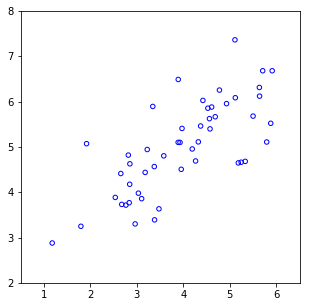

In [375]:
#Visualizing dataset
fig = plt.figure(figsize=(5,5))
plt.scatter(X2[:,0], X2[:,1], 20,marker="o", edgecolor="b", facecolors="None")
plt.xlim(0.5,6.5)
plt.ylim(2,8)

In [376]:
##Before running PCA, it is important to first normalize X
def featureNormalize(x):
    m,n = x.shape
    mu = np.zeros((1,n))
    for i in range(n):
        mu[:,i] = np.mean(x[:,i])
    x_norm = x-mu
    x_final = np.zeros((m,n))
    std = np.zeros((1,n))
    for i in range(n):
        std[:,i] = np.std(x_norm[:,i])
        x_final[:,i] = (x_norm[:,i])/std[:,i]
    return(x_final, mu, std)

#Alternatively above can be done by sklearn library in one line
# from sklearn.preprocessing import StandardScaler
# scalar = StandardScaler()
# X2_norm1 = scalar.fit(X2)

In [377]:
X2_norm, mu, std = featureNormalize(X2)
mu = mu.ravel()
std = std.ravel()

In [378]:
def pca(x):
    m,n = x.shape
    u = np.zeros((n,n))
    s = np.zeros((n,n))
    sigma = x.T.dot(x)           #Covariance matrix
    u, s, v = linalg.svd(sigma)
    u = np.around(u,6)
    s = np.around(s,6)
    return u,s 

#the above can be done using library sklearn.preprocessing 
# from sklearn.preprocessing import StandardScaler
# scalar = StandardScaler()
# X2_norm1 = scalar.fit(X2)
# U, S, V = linalg.svd(scalar.transform(X2).T)

In [379]:
U, S = pca(X2_norm)

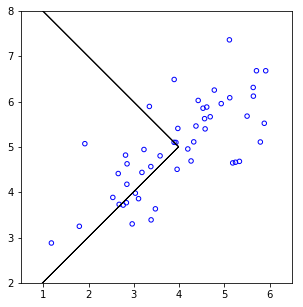

In [381]:
fig = plt.figure(figsize=(5,5))
plt.scatter(X2[:,0], X2[:,1], 20,marker="o", edgecolor="b", facecolors="None")
plt.xlim(0.5,6.5)
plt.ylim(2,8)
plt.gca().set_aspect('equal')
#draw the eigen vectors at the mean of data
for i in range(2):
    plt.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i], color='k')


### Dimensionality Reduction with PCA

In [382]:
def projectData(x,u,k):
    m,n = x.shape
    z = np.zeros((m,k))
    u_red = u[:,0:k]      #U_Reduced
    z = x.dot(u_red)
    z = np.around(z, 6)
    return z

In [383]:
K = 1
Z = projectData(X2_norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))
print('(this value should be about    : 1.481274)')

Projection of the first example: 1.496313
(this value should be about    : 1.481274)


In [388]:
def recoverData(z,u,k):
    x_rec = np.zeros((z.shape[0], u.shape[0]))
    u_red = u[:,0:k]
    x_rec = z.dot(u_red.T)
    return x_rec

In [389]:
X2_rec = recoverData(Z,U,K)

In [394]:
# grader[1] = findClosestCentroids
# grader[2] = computeCentroids
# grader[3] = pca
# grader[4] = projectData
# grader[5]= recoverData
# grader.grade()

In [400]:
data3 = io.loadmat("ex7faces.mat")
print(data3.keys())
X3 = data3["X"]

dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [452]:
def displayData(x, example_width):
    m,n = x.shape
    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = int(n/example_width)
    display_rows = int(np.sqrt(m))
    display_columns = int(np.sqrt(m))
    fig, ax_array = plt.subplots(display_rows, display_columns, figsize=(5,5))
    ax_array = ax_array.ravel()
    for i, ax in enumerate(ax_array):
        ax.imshow(x[i].reshape(example_height, example_width, order='F'), cmap='gray')
        ax.axis("off")

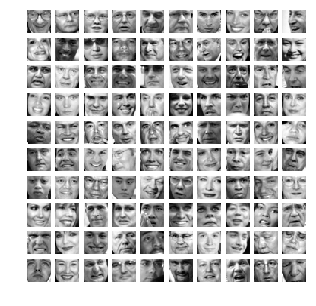

In [454]:
displayData(X3[:100, :], None)

In [458]:
X3_norm, mu3, std3 = featureNormalize(X3)
U3, S3 = pca(X3_norm)

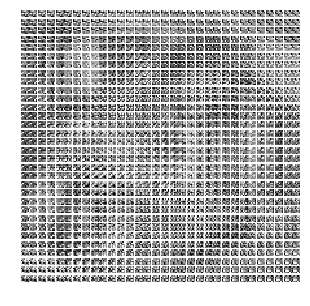

In [467]:
displayData(U3[:,0:36], None)

#### Dimension Reduction on faces(images) using PCA

Text(0.5,0.98,'Reconstructed images')

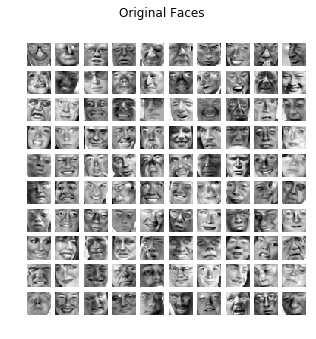

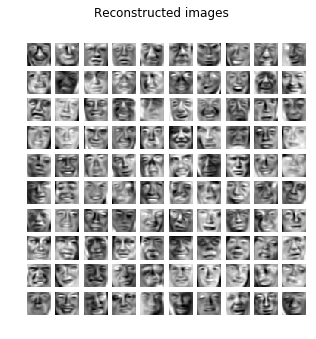

In [482]:
K = 100
Z3 = projectData(X3_norm, U3, K)
X3_rec = recoverData(Z3, U3, K)

#Displaying original face images 
displayData(X3_norm[:100, :], None)
plt.suptitle("Original Faces")

#Displaying reconstructed face images after dimension reduced
displayData(X3_rec[:100,:], None)
plt.suptitle("Reconstructed images")

In [483]:
print("Cheers")

Cheers
